In [103]:
# Sentence segmentation

import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize

# text = "The day we met, Frozen I held my breath Right from the start I knew that I'd found a home for my heart Beats fast Colors and promises How to be brave? How can I love when I'm afraid to fall But watching you stand alone? All of my doubt suddenly goes away somehow One step closer I have died everyday waiting for you Darling don't be afraid I have loved you For a thousand years I'll love you for a thousand more Time stands still Beauty in all she is I will be brave I will not let anything take away What's standing in front of me Every breath Every hour has come to this One step closer I have died everyday waiting for you Darling don't be afraid I have loved you For a thousand years I'll love you for a thousand more And all along I believed I would find you Time has brought your heart to me I have loved you for a thousand years I'll love you for a thousand more I'll love you for a thousand more Ohh One step closer I have died everyday waiting for you Darling don't be afraid I have loved you For a thousand years I'll love you for a thousand more And all along I believed I would find you Time has brought your heart to me I have loved you for a thousand years I'll love you for a thousand more"
text = "Ethical consideration is an important issue in personal and professional life. Over the years, ethical conduct has attracted diverse opinions. This has been the case especially when people compromise ethics for material or other gains. Ethical practice is not an easy task; it calls for a person to be dedicated to ethical principles. There has been increased interest in ethical practice in business in the recent past. The increased interest is as a result of evidence of the effects of unethical practices. Ethics and professionalism is an important issue in banking. Economic effects of unethical practices in the banking industry in the recent past have increased interest in ethics and professionalism. Although being ethical and professional is not easy, nonetheless, individuals can achieve it by considering the broad implication of unprofessional and unethical practices. Ethical issues Evaluating ethical issues that affect a business, project or contract is very important to an ethical and professional practice. In the case of the client with consultancy business, there are various ethical issues and considerations that are involved. Although the business venture seems profitable, ethics and professionalism should not be compromised. To give good recommendations to the client, it is appropriate to consider the motivations and implications of the ventures. One of the major ethical considerations is the credit worthiness of the client. The client want additional credit in orders to finance her new business projects. Although her businesses seem profitable and well controlled, it would be unprofessional to give her additional credit without critically evaluating her ability to payback. Giving additional credit to the client without proper evaluation can amount to taking excessive risk for the bank. In banking, loans are offered to all individuals who qualify. Banking regulations aims at ensuring that loans are given to qualified applicants in a fair manner. Among the considerations for granting loans is the client’s ability to pay back. Also to be considered is the maximum level of credit that than a client is allowed to hold. Although the projects seem to be profitable, the risk posed by the nature of the projects poses ethical and professional issues. The nature of the contract for conducting an in-house promotion of healthy eating style raises ethical issues. The nature of the deal requires ethical consideration. The client benefits from the promotion partly through a small retail on direct outlays. However the major benefit is tagged on the increase in turnover for the cereal product. In additional, the supermarket can terminate the contract without refunds or compensation. The nature of the contract exerts excessive pressure on the promoter. In consequence the promoters can be compelled to conduct unethical in order to meet the goals. The exclusive right to terminate the contract raises ethical issue by itself. The supermarkets can decide to terminate the contract leading to failure to refund or compensate, even when the promoter has done her part of the deal. The sub-contract to supply wooded toys to be used in the promotion brings about conflict of interest. The contract is directly connected to the promotion. In this case the contract should be given to two different parties. The nature of the subcontract also raises ethical issues. The client does not disclose the actual prices of the wooded toy. The wooded toys that she intends to buy for the subcontract are priced three times lower than the prices in her budget. The rationale to use wooded toys to promote sale of the cereals draws ethical questions. The wooden toys are likely to motive customers to buy the cereals, not out of understanding the need for the health product but for the sake of the wooded toys. For the sake of the cheap wooded toys, customers and their children are likely to pick individual packets of the product that they do not require. The way the wooded toys are produces raises ethical questions. The wooded toys are produced from barks of a king of hardwood in Papua New Guinea. Trade in the new product is likely to promote deforestation of the forests. In addition, the wooded toys are mostly prepared by children who are paid low wages for their services. By buying the wooded toys, the client would be promoting child labor. Ethics and professionalism should consider the consequences of every action. Ethical code and regulations aim at ensuring that ethical issues are considered before making a decision. Ethical practice calls for one to be responsible of the result of the actions that one in involved. In identifying the ethic issues in the clients’ cases, the consequences are considered. The financial and material gain from the intended projects may tempt the individuals involved to compromise ethical consideration. However, a professional should be able to overcome the temptations to compromise professionalism for anticipated financial or material gain. In most issues, the principal interests and ethical consideration of stakeholders differ significantly. Each stakeholder tries to achieve their goals and may have different ethical considerations. The various stakeholders in the case study may have different main interests and ethical issue to consider. The bank, the client, the supermarket, the customers and the producers are motivated by different interests. The interest of the client is to grow her business. The client is interested in having her consultancy business grow and increase its returns. To achieve her interest, the client has been looking for more promotion contracts in the supermarkets. However, the client does not have enough funds to support the growth. This has led her to seek credit from the bank in order to finance her projects. The client has ethical responsibility to the persons she is working with. The client has to ensure that she offers quality service to her clients. In the case study, the client should offer quality promotion services to the supermarkets. The client is also ethically responsible to customers. The client has to ensure that she does not promote products that are harmful to public. To the bank, the client the client has to ensure that she honors her credits. She should pay back her loan as agreed. The main interest for the bank in the case study is to gain interest from loans advanced to its clients. In the case study, the bank hopes to earn interest from the money advanced to the client. The bank has ethical responsibility to its clients, investors and the public. The bank has to offer credit to its clients without discrimination. It has to provide all the required information on the loans and ensure that the terms offered are fair. In the case study, the bank is responsible for ensuring that it maintains healthy credit level for its client. The principle interest for the supermarket is to gain returns from sale of commodities. In its practice, the supermarket is ethically responsible to its customer, suppliers and other stakeholders. The supermarket is ethically responsible to ensure that the commodities it offers to its customers are of good quality and fairly priced. The supermarket should ensure that it does not manipulate its customers towards buying certain commodities. On the other hand, the principle interest of the supermarket’s customers is to buy goods of high quality at fair prices. Producers, on the other hand, have ethical responsibility for producing quality commodities using justifiable means. In the case study, the producers should produce quality products for the supermarket. They should also ensure that they do not exploit their employees in order to increase profit margins. Ethical theories Ethical conduct and professionalism result from ethical principles of an individual or an institution. Ethical conduct has been discussed by various philosophers in history. In Europe, philosophers such as Aristotle, Socrates, and Plato helped form the foundation for ethical theories. On the other hand, more current philosophers such as Immanuel Kant helped to form some of the theories. Various ethical theories are used to guide ethical conduct. The common theories are Deontology and utilitarianism. However, other theories such as Right theories, Casuist, Natural law and Virtue theory also exist. Deontology ethical theory is one of the influential ethical theories in Europe. The ethical theory emphasizes adherence to duty in ethical conducts. The theory considers upholding duties of an individual to another individual of society as what is ethically correct. An individual using this theory, thus, ask himself or herself what is his or her duty before deciding on an action. Deontology ethical theory emphasize on certain moral rules that cannot be broken. A person using this theory does what is considered right even if the result does not seem to be favorable. In the case study, using deontology ethical theory, the individuals involved would evaluate their duties before deciding on their actions. For example, the banker should evaluate his duties and responsibility to decide on the right action to take with the clients. Using this theory, the client may decide against buying the cheap wooden toys. The fact that production of the wooden toys promotes deforestation, low wages are paid villagers and children are used in the production can make the client to decide not to buy the wooden toys. Utilitarianism theory promotes valued or favorable ends to an action. The foundation of the theory is the ability of a person to predict the consequences of an action. The basic principle of utilitarianism is to act in a manner that lead to benefits to most people or leads to the highest good. Unlike deontology, Utilitarianism is not guided by some static moral rules but emphasizes on ability to foretell the outcome. In deciding whether to grant an additional loan to the client, the banker should be able to evaluate the outcome of such actions. In the anticipated outcome is favorable, the banker can decide to grant the additional loan. On the other hand, using utilitarianism the client can decide whether to accept the contract depending on the consequences. Other ethical theories also influence ethical conduct. The right theory emphasizes the rights given to members of the society. A person using this theory aim at ensuring that rights provided to other individual are upheld. In the case study, the parties involved should ensure that the rights provided to other parties are not compromised. Casuist ethical theory can also be used in making ethical decision. This theory compares an ethical dilemma with similar ethical dilemma in the past. Using this theory in the case study, the individuals involved should evaluate their actions with similar cases in the past. If the outcomes of a similar case in the past were bad, then the action is abandoned."

sentences = sent_tokenize(text)
print(sentences)

['Ethical consideration is an important issue in personal and professional life.', 'Over the years, ethical conduct has attracted diverse opinions.', 'This has been the case especially when people compromise ethics for material or other gains.', 'Ethical practice is not an easy task; it calls for a person to be dedicated to ethical principles.', 'There has been increased interest in ethical practice in business in the recent past.', 'The increased interest is as a result of evidence of the effects of unethical practices.', 'Ethics and professionalism is an important issue in banking.', 'Economic effects of unethical practices in the banking industry in the recent past have increased interest in ethics and professionalism.', 'Although being ethical and professional is not easy, nonetheless, individuals can achieve it by considering the broad implication of unprofessional and unethical practices.', 'Ethical issues Evaluating ethical issues that affect a business, project or contract is v

[nltk_data] Downloading package punkt to C:\Users\Sahil
[nltk_data]     Raj\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [104]:
import numpy as np
emptyarray= np.empty((len(sentences),1,3),dtype=object)
# print(emptyarray)
for s in range(len(sentences)):
    emptyarray[s][0][0] = sentences[s]
    emptyarray[s][0][1] = s
emptyarray

array([[['Ethical consideration is an important issue in personal and professional life.',
         0, None]],

       [['Over the years, ethical conduct has attracted diverse opinions.',
         1, None]],

       [['This has been the case especially when people compromise ethics for material or other gains.',
         2, None]],

       [['Ethical practice is not an easy task; it calls for a person to be dedicated to ethical principles.',
         3, None]],

       [['There has been increased interest in ethical practice in business in the recent past.',
         4, None]],

       [['The increased interest is as a result of evidence of the effects of unethical practices.',
         5, None]],

       [['Ethics and professionalism is an important issue in banking.',
         6, None]],

       [['Economic effects of unethical practices in the banking industry in the recent past have increased interest in ethics and professionalism.',
         7, None]],

       [['Although being et

In [105]:
# Tokenization

from string import punctuation
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to C:\Users\Sahil
[nltk_data]     Raj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [106]:
# Bi-grams

bi_token=[]
bi_token_length=[]
tri_token_length=[]

for u in range(len(sentences)):
    sent_split1=[w.lower() for w in sentences[u].split(" ")]
    sent_split=[w for w in sent_split1 if w not in stop_words and w not in punctuation and not w.isdigit()]
#     print(sent_split)
    bigrams_list = [bigram for bigram in nltk.bigrams(sent_split)]
#     print(bigrams_list)
    bi_token.append(bigrams_list)
    bi_token_length.append(len(bi_token[u]))

bi_tokens = [(int(o) / max(bi_token_length))*100 for o in bi_token_length]
print(bi_tokens)
print("bitokens feature vector:",(bi_token_length))

[33.33333333333333, 27.77777777777778, 33.33333333333333, 44.44444444444444, 33.33333333333333, 33.33333333333333, 22.22222222222222, 61.111111111111114, 66.66666666666666, 66.66666666666666, 44.44444444444444, 38.88888888888889, 44.44444444444444, 33.33333333333333, 44.44444444444444, 83.33333333333334, 61.111111111111114, 22.22222222222222, 50.0, 38.88888888888889, 38.88888888888889, 61.111111111111114, 55.55555555555556, 22.22222222222222, 38.88888888888889, 38.88888888888889, 33.33333333333333, 27.77777777777778, 38.88888888888889, 38.88888888888889, 66.66666666666666, 44.44444444444444, 16.666666666666664, 27.77777777777778, 27.77777777777778, 27.77777777777778, 55.55555555555556, 50.0, 72.22222222222221, 61.111111111111114, 33.33333333333333, 44.44444444444444, 33.33333333333333, 50.0, 38.88888888888889, 27.77777777777778, 50.0, 44.44444444444444, 33.33333333333333, 61.111111111111114, 55.55555555555556, 38.88888888888889, 38.88888888888889, 55.55555555555556, 38.88888888888889, 

In [107]:
# Tri-grams

tri_token=[]
for u in range(len(sentences)):
    sent_split2=[w.lower() for w in sentences[u].split(" ")]
    sent_split3=[w for w in sent_split2 if w not in stop_words and w not in punctuation and not w.isdigit()]
    trigrams_list = [trigram for trigram in nltk.trigrams(sent_split3)]
    tri_token.append(trigrams_list)
    tri_token_length.append(len(tri_token[u]))
tri_tokens = [(int(m) / max(tri_token_length))*100 for m in tri_token_length]
print(tri_tokens)
print("tritokens feature vector:",tri_token_length)

[29.411764705882355, 23.52941176470588, 29.411764705882355, 41.17647058823529, 29.411764705882355, 29.411764705882355, 17.647058823529413, 58.82352941176471, 64.70588235294117, 64.70588235294117, 41.17647058823529, 35.294117647058826, 41.17647058823529, 29.411764705882355, 41.17647058823529, 82.35294117647058, 58.82352941176471, 17.647058823529413, 47.05882352941176, 35.294117647058826, 35.294117647058826, 58.82352941176471, 52.94117647058824, 17.647058823529413, 35.294117647058826, 35.294117647058826, 29.411764705882355, 23.52941176470588, 35.294117647058826, 35.294117647058826, 64.70588235294117, 41.17647058823529, 11.76470588235294, 23.52941176470588, 23.52941176470588, 23.52941176470588, 52.94117647058824, 47.05882352941176, 70.58823529411765, 58.82352941176471, 29.411764705882355, 41.17647058823529, 29.411764705882355, 47.05882352941176, 35.294117647058826, 23.52941176470588, 47.05882352941176, 41.17647058823529, 29.411764705882355, 58.82352941176471, 52.94117647058824, 35.2941176

In [108]:
# Sentence Position Feature

import math
def position(l):
    return [index for index, value in enumerate(sentences)]

sent_position= (position(sentences))
print("sentence position:",sent_position)
num_sent=len(sent_position)
print("Total number of sentences:",num_sent)

sentence position: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112]
Total number of sentences: 113


In [109]:
position = []
position_rbm = []

# sentence postion feature of first sentence
sent_pos1_rbm = 1
sent_pos1 = 100
position.append(sent_pos1)
position_rbm.append(sent_pos1_rbm)

# for all sentences except first and last
for x in range(1,num_sent-1):
    s_p= ((num_sent-x)/num_sent)*100
    position.append(s_p)
    s_p_rbm = (num_sent-x)/num_sent
    position_rbm.append(s_p_rbm)
    
# sentence postion feature of last sentence
sent_pos2_rbm = 1
sent_pos2 = 100
position.append(sent_pos2)
position_rbm.append(sent_pos2_rbm)

print("Sentence position feature vector:",position_rbm)

Sentence position feature vector: [1, 0.9911504424778761, 0.9823008849557522, 0.9734513274336283, 0.9646017699115044, 0.9557522123893806, 0.9469026548672567, 0.9380530973451328, 0.9292035398230089, 0.9203539823008849, 0.911504424778761, 0.9026548672566371, 0.8938053097345132, 0.8849557522123894, 0.8761061946902655, 0.8672566371681416, 0.8584070796460177, 0.8495575221238938, 0.8407079646017699, 0.831858407079646, 0.8230088495575221, 0.8141592920353983, 0.8053097345132744, 0.7964601769911505, 0.7876106194690266, 0.7787610619469026, 0.7699115044247787, 0.7610619469026548, 0.7522123893805309, 0.7433628318584071, 0.7345132743362832, 0.7256637168141593, 0.7168141592920354, 0.7079646017699115, 0.6991150442477876, 0.6902654867256637, 0.6814159292035398, 0.672566371681416, 0.6637168141592921, 0.6548672566371682, 0.6460176991150443, 0.6371681415929203, 0.6283185840707964, 0.6194690265486725, 0.6106194690265486, 0.6017699115044248, 0.5929203539823009, 0.584070796460177, 0.5752212389380531, 0.5663

In [110]:
# Converting Sentences to Vectors

def convertToVSM(sentences):
    vocabulary = []
    for sents in sentences:
        vocabulary.extend(sents)
    vocabulary = list(set(vocabulary))
    print("vocab", vocabulary)
    vectors = []
    for sents in sentences:
        vector = []
        for tokenss in vocabulary:
            print(tokenss)
            vector.append(sents.count(tokenss))
        vectors.append(vector)
    return vectors
VSM=convertToVSM(sentences)
print(sentences)
print("SentenceVectors:",VSM)

vocab ['I', 'H', 'q', 'v', 'h', 'o', '-', 'c', ',', 'U', 'l', 'z', 'F', 'K', 'D', 'C', 'E', 't', 'e', 'j', ';', 'f', ' ', 'p', 'a', 'm', 'T', 'B', 'w', 'G', 'n', 'P', 'i', '’', '.', 'k', 'd', 'R', 'O', 'V', 'g', 'A', 'b', 's', 'N', 'S', 'x', 'r', 'y', 'u']
I
H
q
v
h
o
-
c
,
U
l
z
F
K
D
C
E
t
e
j
;
f
 
p
a
m
T
B
w
G
n
P
i
’
.
k
d
R
O
V
g
A
b
s
N
S
x
r
y
u
I
H
q
v
h
o
-
c
,
U
l
z
F
K
D
C
E
t
e
j
;
f
 
p
a
m
T
B
w
G
n
P
i
’
.
k
d
R
O
V
g
A
b
s
N
S
x
r
y
u
I
H
q
v
h
o
-
c
,
U
l
z
F
K
D
C
E
t
e
j
;
f
 
p
a
m
T
B
w
G
n
P
i
’
.
k
d
R
O
V
g
A
b
s
N
S
x
r
y
u
I
H
q
v
h
o
-
c
,
U
l
z
F
K
D
C
E
t
e
j
;
f
 
p
a
m
T
B
w
G
n
P
i
’
.
k
d
R
O
V
g
A
b
s
N
S
x
r
y
u
I
H
q
v
h
o
-
c
,
U
l
z
F
K
D
C
E
t
e
j
;
f
 
p
a
m
T
B
w
G
n
P
i
’
.
k
d
R
O
V
g
A
b
s
N
S
x
r
y
u
I
H
q
v
h
o
-
c
,
U
l
z
F
K
D
C
E
t
e
j
;
f
 
p
a
m
T
B
w
G
n
P
i
’
.
k
d
R
O
V
g
A
b
s
N
S
x
r
y
u
I
H
q
v
h
o
-
c
,
U
l
z
F
K
D
C
E
t
e
j
;
f
 
p
a
m
T
B
w
G
n
P
i
’
.
k
d
R
O
V
g
A
b
s
N
S
x
r
y
u
I
H
q
v
h
o
-
c
,
U
l
z
F
K
D
C
E
t
e
j
;
f

In [111]:
# TF-ISF feature and Centroid Calculation

sentencelength=len(sentences)
def calcMeanTF_ISF(VSM, index):
    vocab_len = len(VSM[index])
    sentences_len = len(VSM)
    count = 0
    tfisf = 0
    for i in range(vocab_len):
        tf = VSM[index][i]
        if(tf>0):
            count += 1
            sent_freq = 0
            for j in range(sentences_len):
                if(VSM[j][i]>0): sent_freq += 1
            tfisf += (tf)*(1.0/sent_freq)
    if(count > 0):
        mean_tfisf = tfisf/count
    else:
        mean_tfisf = 0
    return tf, (1.0/sent_freq), mean_tfisf
tfvec=[]
isfvec=[]
tfisfvec=[]
tfisfvec_rbm=[]
for i in range(sentencelength):
    x,y,z=calcMeanTF_ISF(VSM,i)
    tfvec.append(x)
    isfvec.append(y)
    tfisfvec.append(z*100)
    tfisfvec_rbm.append(z)
print("TF-ISF vector:",tfisfvec_rbm)
maxtf_isf=max(tfisfvec_rbm)
centroid=[]
centroid.append(maxtf_isf)
print("Max TF-ISF:",centroid)
centroid=(max(VSM))
print("Centroid:",centroid)

TF-ISF vector: [0.041129993410589226, 0.03808337496016277, 0.042073228251031394, 0.09391525387270877, 0.04623359745302654, 0.04340887457331174, 0.02920284661885261, 0.05650672143343141, 0.07265998193696553, 0.0640182488043825, 0.05495105979137546, 0.04641261888321588, 0.05406419398844706, 0.05273500487327439, 0.04253875896564598, 0.06891707497730501, 0.07024111707334187, 0.029533907322958606, 0.06456514401533403, 0.051717979898028114, 0.0492387755700717, 0.0619015221243637, 0.06919282625068131, 0.030313513139899637, 0.03777664943496944, 0.04983464349966604, 0.04106527344140199, 0.048153189939777914, 0.045432436731913994, 0.03931553684833639, 0.06042951929219514, 0.06158614668163939, 0.02710039018861006, 0.030954967549627625, 0.031206711779406756, 0.03101758177003665, 0.05000686753524088, 0.04038977514464543, 0.06086800950319725, 0.07889683582436473, 0.032790944884363765, 0.08304283801639441, 0.03327555013212566, 0.045068027641662844, 0.05230318372325986, 0.03733796495792764, 0.05028037

In [112]:
# Cosine Similarity between Centroid and Sentences

from numpy import dot
from numpy.linalg import norm
cosine_similarity=[]
cosine_similarity_rbm=[]
for z in range(sentencelength):
    cos_simi = ((dot(centroid, VSM[z])/(norm(centroid)*norm(VSM[z])))*100)
    cosine_similarity.append(cos_simi)
    cos_simi_rbm = (dot(centroid, VSM[z])/(norm(centroid)*norm(VSM[z])))
    cosine_similarity_rbm.append(cos_simi_rbm)
print("Cosine Similarity Vector:",cosine_similarity_rbm)

Cosine Similarity Vector: [0.8725739325035381, 0.9265536406521307, 0.9160422635868752, 0.9064218581360379, 0.8830456885930085, 0.9196651963739131, 0.792862005418871, 0.9078611138758227, 0.8968645947760255, 0.9033039036395605, 0.9286458834724545, 0.892016542363509, 0.9192552506154343, 0.9376049348569672, 0.9272364758617084, 0.9253030051016826, 0.9282145046817303, 0.8621118263188644, 0.8758348342783318, 0.8894822113152484, 0.9300828239576119, 0.9253743811393397, 0.9433332612731565, 0.9541935519496473, 0.9514722624845746, 0.9622839548766335, 0.9352773216131336, 0.9100295219952027, 0.9109603089754807, 0.901783551051254, 0.9747793254586695, 0.8889415543701451, 0.8590302299283251, 0.9488417917042364, 0.8932719699314428, 0.9005004170528446, 0.9519201147957215, 0.9394027060178517, 0.9430517040726566, 0.9529121630144061, 0.9111128179630057, 0.893130632812349, 0.9537577118595695, 0.9451369023075309, 0.8634298611646491, 0.8734654771918673, 0.9231245660830486, 0.940383715075685, 0.8446226691188314

In [113]:
# Sentence length feature

sent_word=[]
for u in range(len(sentences)):
    sent_split1=[w.lower() for w in sentences[u].split(" ")]
    sent_split=[w for w in sent_split1 if w not in stop_words and w not in punctuation and not w.isdigit()]
    a=(len(sent_split))
    sent_word.append(a)
# print(sent_word)

# LENGTH OF SENTENCE/ LONGEST SENTENCE
longest_sent=max(sent_word)
sent_length=[]
sent_length_rbm=[]
for x in sent_word:
    sent_length.append((x/longest_sent)*100)
    sent_length_rbm.append(x/longest_sent)
#print(sent_length)

print("Sentence length feature vector:",sent_length_rbm)

Sentence length feature vector: [0.3684210526315789, 0.3157894736842105, 0.3684210526315789, 0.47368421052631576, 0.3684210526315789, 0.3684210526315789, 0.2631578947368421, 0.631578947368421, 0.6842105263157895, 0.6842105263157895, 0.47368421052631576, 0.42105263157894735, 0.47368421052631576, 0.3684210526315789, 0.47368421052631576, 0.8421052631578947, 0.631578947368421, 0.2631578947368421, 0.5263157894736842, 0.42105263157894735, 0.42105263157894735, 0.631578947368421, 0.5789473684210527, 0.2631578947368421, 0.42105263157894735, 0.42105263157894735, 0.3684210526315789, 0.3157894736842105, 0.42105263157894735, 0.42105263157894735, 0.6842105263157895, 0.47368421052631576, 0.21052631578947367, 0.3157894736842105, 0.3157894736842105, 0.3157894736842105, 0.5789473684210527, 0.5263157894736842, 0.7368421052631579, 0.631578947368421, 0.3684210526315789, 0.47368421052631576, 0.3684210526315789, 0.5263157894736842, 0.42105263157894735, 0.3157894736842105, 0.5263157894736842, 0.47368421052631

In [114]:
# Numeric token Feature

import re
num_word=[]
numeric_token=[]
numeric_token_rbm=[]
for u in range(len(sentences)):
    sent_split4=sentences[u].split(" ")
    e=re.findall("\d+",sentences[u])
    noofwords=(len(e))
    num_word.append(noofwords)
    numeric_token.append((num_word[u]/sent_word[u])*100)
    numeric_token_rbm.append(num_word[u]/sent_word[u])
print("Numeric token feature vector:",numeric_token_rbm)

Numeric token feature vector: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [115]:
# Thematic words feature

from rake_nltk import Rake
r = Rake() # Uses stopwords for english from NLTK, and all puntuation characters.
keywords=[]
# If you want to provide your own set of stop words and punctuations to
# r = Rake(<list of stopwords>, <string of puntuations to ignore>)

for s in sentences:
    r.extract_keywords_from_text(s)
    key=list(r.get_ranked_phrases())
    keywords.append(key)
#print(keywords)
l_keywords=[]
for s in keywords:
    leng=len(s)
    l_keywords.append(leng)
#print(l_keywords)

total_keywords=sum(l_keywords)
#print(total_keywords)

thematic_number= []
thematic_number_rbm= []
for x in l_keywords:
    thematic_number.append((x/total_keywords)*100)
    thematic_number_rbm.append(x/total_keywords)
print("Thematic word feature", thematic_number_rbm)

Thematic word feature [0.006482982171799027, 0.004862236628849271, 0.006482982171799027, 0.009724473257698542, 0.006482982171799027, 0.008103727714748784, 0.006482982171799027, 0.011345218800648298, 0.017828200972447326, 0.012965964343598054, 0.009724473257698542, 0.008103727714748784, 0.011345218800648298, 0.006482982171799027, 0.006482982171799027, 0.014586709886547812, 0.008103727714748784, 0.008103727714748784, 0.009724473257698542, 0.009724473257698542, 0.011345218800648298, 0.011345218800648298, 0.008103727714748784, 0.0032414910858995136, 0.006482982171799027, 0.009724473257698542, 0.008103727714748784, 0.004862236628849271, 0.011345218800648298, 0.004862236628849271, 0.019448946515397084, 0.011345218800648298, 0.004862236628849271, 0.006482982171799027, 0.0032414910858995136, 0.006482982171799027, 0.011345218800648298, 0.006482982171799027, 0.01620745542949757, 0.012965964343598054, 0.004862236628849271, 0.009724473257698542, 0.008103727714748784, 0.009724473257698542, 0.006482

In [116]:
# proper noun feature

from nltk.tag import pos_tag
from collections import Counter
nltk.download('averaged_perceptron_tagger')
pncounts = []
pncounts_rbm = []
for sentence in sentences:
    tagged=nltk.pos_tag(nltk.word_tokenize(str(sentence)))
    print("Tagged :" ,tagged)
    counts = Counter(tag for word,tag in tagged if tag.startswith('NNP') or tag.startswith('NNPS'))
    print("Counts :" , counts , "\n")
    f=sum(counts.values())
    pncounts.append(f)
    pncounts_rbm.append(f)
pnounscore=[(int(o) / int(p))*100 for o,p in zip(pncounts, sent_word)]
pnounscore_rbm=[int(o) / int(p) for o,p in zip(pncounts_rbm, sent_word)]
#print(pncounts)
print("Pronoun feature vector",pnounscore_rbm)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Sahil Raj\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Tagged : [('Ethical', 'JJ'), ('consideration', 'NN'), ('is', 'VBZ'), ('an', 'DT'), ('important', 'JJ'), ('issue', 'NN'), ('in', 'IN'), ('personal', 'JJ'), ('and', 'CC'), ('professional', 'JJ'), ('life', 'NN'), ('.', '.')]
Counts : Counter() 

Tagged : [('Over', 'IN'), ('the', 'DT'), ('years', 'NNS'), (',', ','), ('ethical', 'JJ'), ('conduct', 'NN'), ('has', 'VBZ'), ('attracted', 'VBN'), ('diverse', 'JJ'), ('opinions', 'NNS'), ('.', '.')]
Counts : Counter() 

Tagged : [('This', 'DT'), ('has', 'VBZ'), ('been', 'VBN'), ('the', 'DT'), ('case', 'NN'), ('especially', 'RB'), ('when', 'WRB'), ('people', 'NNS'), ('compromise', 'VBP'), ('ethics', 'NNS'), ('for', 'IN'), ('material', 'NN'), ('or', 'CC'), ('other', 'JJ'), ('gains', 'NNS'), ('.', '.')]
Counts : Counter() 

Tagged : [('Ethical', 'JJ'), ('practice', 'NN'), ('is', 'VBZ'), ('not', 'RB'), ('an', 'DT'), ('easy', 'JJ'), ('task', 'NN'), (';', ':'), ('it', 'PRP'), ('calls', 'VBZ'), ('for', 'IN'), ('a', 'DT'), ('person', 'NN'), ('to', 'TO'), 

Tagged : [('The', 'DT'), ('client', 'NN'), ('does', 'VBZ'), ('not', 'RB'), ('disclose', 'VB'), ('the', 'DT'), ('actual', 'JJ'), ('prices', 'NNS'), ('of', 'IN'), ('the', 'DT'), ('wooded', 'JJ'), ('toy', 'NN'), ('.', '.')]
Counts : Counter() 

Tagged : [('The', 'DT'), ('wooded', 'JJ'), ('toys', 'NN'), ('that', 'IN'), ('she', 'PRP'), ('intends', 'VBZ'), ('to', 'TO'), ('buy', 'VB'), ('for', 'IN'), ('the', 'DT'), ('subcontract', 'NN'), ('are', 'VBP'), ('priced', 'VBN'), ('three', 'CD'), ('times', 'NNS'), ('lower', 'JJR'), ('than', 'IN'), ('the', 'DT'), ('prices', 'NNS'), ('in', 'IN'), ('her', 'PRP$'), ('budget', 'NN'), ('.', '.')]
Counts : Counter() 

Tagged : [('The', 'DT'), ('rationale', 'NN'), ('to', 'TO'), ('use', 'VB'), ('wooded', 'JJ'), ('toys', 'NNS'), ('to', 'TO'), ('promote', 'VB'), ('sale', 'NN'), ('of', 'IN'), ('the', 'DT'), ('cereals', 'NNS'), ('draws', 'VBP'), ('ethical', 'JJ'), ('questions', 'NNS'), ('.', '.')]
Counts : Counter() 

Tagged : [('The', 'DT'), ('wooden', 'JJ'), ('

Tagged : [('The', 'DT'), ('supermarket', 'NN'), ('is', 'VBZ'), ('ethically', 'RB'), ('responsible', 'JJ'), ('to', 'TO'), ('ensure', 'VB'), ('that', 'IN'), ('the', 'DT'), ('commodities', 'NNS'), ('it', 'PRP'), ('offers', 'VBZ'), ('to', 'TO'), ('its', 'PRP$'), ('customers', 'NNS'), ('are', 'VBP'), ('of', 'IN'), ('good', 'JJ'), ('quality', 'NN'), ('and', 'CC'), ('fairly', 'RB'), ('priced', 'VBN'), ('.', '.')]
Counts : Counter() 

Tagged : [('The', 'DT'), ('supermarket', 'NN'), ('should', 'MD'), ('ensure', 'VB'), ('that', 'IN'), ('it', 'PRP'), ('does', 'VBZ'), ('not', 'RB'), ('manipulate', 'VB'), ('its', 'PRP$'), ('customers', 'NNS'), ('towards', 'IN'), ('buying', 'VBG'), ('certain', 'JJ'), ('commodities', 'NNS'), ('.', '.')]
Counts : Counter() 

Tagged : [('On', 'IN'), ('the', 'DT'), ('other', 'JJ'), ('hand', 'NN'), (',', ','), ('the', 'DT'), ('principle', 'JJ'), ('interest', 'NN'), ('of', 'IN'), ('the', 'DT'), ('supermarket', 'NN'), ('’', 'NNP'), ('s', 'NN'), ('customers', 'NNS'), ('is',

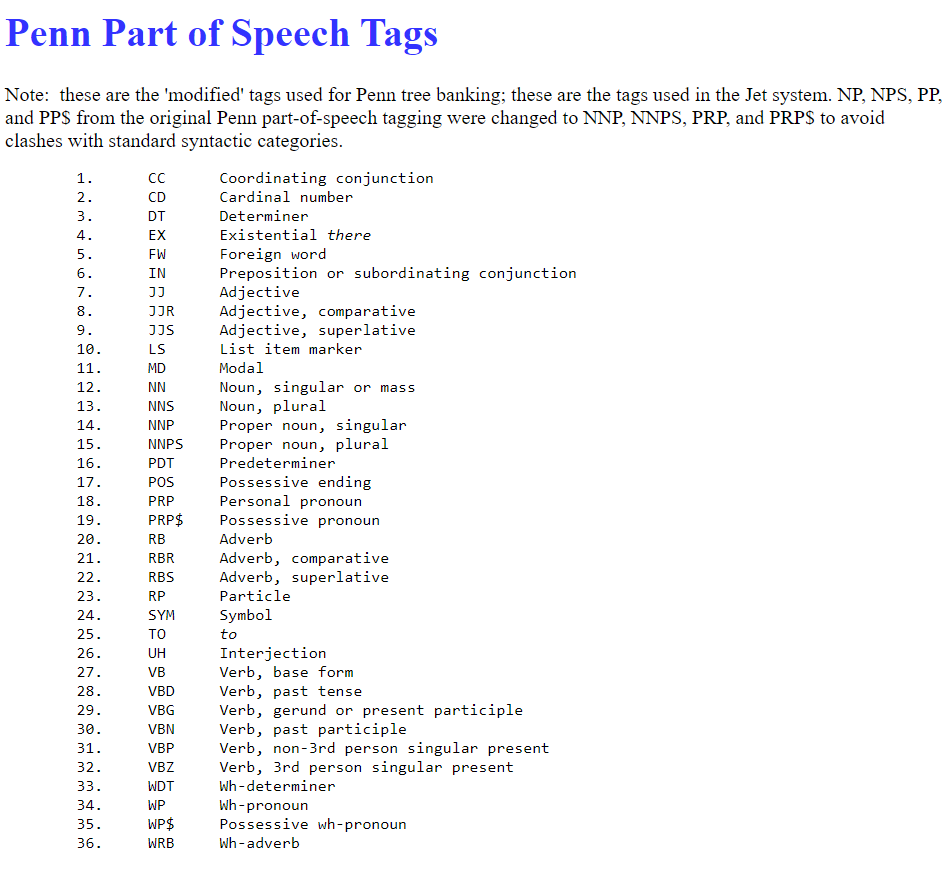

In [117]:
# Feature Matrix 

featureMatrix = []
featureMatrix.append(position_rbm)
featureMatrix.append(bi_token_length)
featureMatrix.append(tri_token_length)
featureMatrix.append(tfisfvec_rbm)
featureMatrix.append(cosine_similarity_rbm)
featureMatrix.append(thematic_number_rbm)
featureMatrix.append(sent_length_rbm)
featureMatrix.append(numeric_token_rbm)
featureMatrix.append(pnounscore_rbm)



featureMat = np.zeros((len(sentences),9))
for i in range(9) :
    for j in range(len(sentences)):
        featureMat[j][i] = featureMatrix[i][j]

print("\n\n\nPrinting Feature Matrix : ")
print(featureMat)
print("\n\n\nPrinting Feature Matrix Normed : ")
#featureMat_normed = featureMat / featureMat.max(axis=0)
featureMat_normed = featureMat

print(featureMat_normed)
for i in range(len(sentences)):
    print(featureMat_normed[i])
#np.save('output_labels_10.npy',featureMat_normed)




Printing Feature Matrix : 
[[ 1.          6.          5.         ...  0.36842105  0.
   0.        ]
 [ 0.99115044  5.          4.         ...  0.31578947  0.
   0.        ]
 [ 0.98230088  6.          5.         ...  0.36842105  0.
   0.        ]
 ...
 [ 0.02654867  7.          6.         ...  0.42105263  0.
   0.        ]
 [ 0.01769912 10.          9.         ...  0.57894737  0.
   0.        ]
 [ 1.          6.          5.         ...  0.36842105  0.
   0.        ]]



Printing Feature Matrix Normed : 
[[ 1.          6.          5.         ...  0.36842105  0.
   0.        ]
 [ 0.99115044  5.          4.         ...  0.31578947  0.
   0.        ]
 [ 0.98230088  6.          5.         ...  0.36842105  0.
   0.        ]
 ...
 [ 0.02654867  7.          6.         ...  0.42105263  0.
   0.        ]
 [ 0.01769912 10.          9.         ...  0.57894737  0.
   0.        ]
 [ 1.          6.          5.         ...  0.36842105  0.
   0.        ]]
[1.         6.         5.         0.04112999 

In [123]:
import numpy as np
import matplotlib
%matplotlib inline
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# New Antecedent/Consequent objects hold universe variables and membership
# functions
position1 = ctrl.Antecedent(np.arange(0, 100, 10), 'position1')
cos_similarity = ctrl.Antecedent(np.arange(0, 100, 10), 'cos_similarity')
bitokens = ctrl.Antecedent(np.arange(0, 100, 10), 'bitokens')
tritokens = ctrl.Antecedent(np.arange(0, 100, 10), 'tritokens')
propernoun = ctrl.Antecedent(np.arange(0, 100, 10), 'propernoun')
sentencelength = ctrl.Antecedent(np.arange(0, 100, 10), 'sentencelength')
numtokens = ctrl.Antecedent(np.arange(0, 100, 10), 'numtokens')
keywords = ctrl.Antecedent(np.arange(0, 10, 1), 'keywords')
tf_isf = ctrl.Antecedent(np.arange(0, 100, 10), 'tf_isf')


senten = ctrl.Consequent(np.arange(0, 100, 10), 'senten')

position1.automf(3)
cos_similarity.automf(3)
bitokens.automf(3)
tritokens.automf(3)
propernoun.automf(3)
sentencelength.automf(3)
numtokens.automf(3)
keywords.automf(3)
tf_isf.automf(3)


senten['bad'] = fuzz.trimf(senten.universe, [0, 0, 50])
senten['avg'] = fuzz.trimf(senten.universe, [0, 50, 100])
senten['good'] = fuzz.trimf(senten.universe, [50, 100, 100])

rule1 = ctrl.Rule(position1['good'] & sentencelength['good'] & propernoun['good'] &numtokens['good'], senten['good'])
rule2 = ctrl.Rule(position1['poor'] & sentencelength['poor'] & numtokens['poor'], senten['bad'])
rule3 = ctrl.Rule(propernoun['poor'] & keywords['average'], senten['bad'])
rule4 = ctrl.Rule(cos_similarity['good'], senten['good'])
rule5 = ctrl.Rule(bitokens['good'] & tritokens['good'] & numtokens['average'] | tf_isf['average'], senten['avg'])


sent_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5])
Sent = ctrl.ControlSystemSimulation(sent_ctrl)
fuzzemptyarr= np.empty((20,1,2), dtype=object)
t2=0
summary2=[]
for i in range(min(len(sentences), 20)):
    Sent.input['position1'] = int(position[i])
    Sent.input['cos_similarity'] = int(cosine_similarity[i])
    Sent.input['bitokens'] = int(bi_tokens[i])
    Sent.input['tritokens'] = int(tri_tokens[i])
    Sent.input['tf_isf'] = int(tfisfvec[i])
    Sent.input['keywords'] = int(thematic_number[i])
    Sent.input['propernoun'] = int(pnounscore[i])
    Sent.input['sentencelength'] = int(sent_length[i])
    Sent.input['numtokens'] = int(numeric_token[i])
    Sent.compute()
    if Sent.output['senten'] > 50:
        summary2.append((sentences[i]))
        fuzzemptyarr[t2][0][0] = sentences[i]
        fuzzemptyarr[t2][0][1] = i
        t2 += 1
fuzzarray = np.empty((len(summary2),1,2),dtype=object)
for i in range(len(summary2)):
    fuzzarray[i][0][0] = fuzzemptyarr[i][0][0]
    fuzzarray[i][0][1] = fuzzemptyarr[i][0][1]
    
fuzzarray=fuzzarray[1:]
print("Fuzzy logic summary \n\n",(" ").join(summary2))
#print(len(summary2))
#print(fuzzarray)
    #senten.view(sim=Sent)

Fuzzy logic summary 

 Ethical consideration is an important issue in personal and professional life. Over the years, ethical conduct has attracted diverse opinions. This has been the case especially when people compromise ethics for material or other gains. Ethical practice is not an easy task; it calls for a person to be dedicated to ethical principles. There has been increased interest in ethical practice in business in the recent past. The increased interest is as a result of evidence of the effects of unethical practices. Ethics and professionalism is an important issue in banking. Economic effects of unethical practices in the banking industry in the recent past have increased interest in ethics and professionalism. Although being ethical and professional is not easy, nonetheless, individuals can achieve it by considering the broad implication of unprofessional and unethical practices. Ethical issues Evaluating ethical issues that affect a business, project or contract is very im